dataset from: https://www.kaggle.com/datasets/jonwright13/ufo-sightings-around-the-world-better/data
Dataset contains over 80,000 records of UFO sightings starting from 1906 to 2014. 


In [5]:
#check UFOs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('Datasets/UFO.csv')
df.dtypes
df.head()

# https://pypi.org/project/fitter/0.2.0/ - fitter package provides a simple class to figure out from whih distribution your data comes from. It uses scipy package to try 80 ditribution and allows you to plot the results to check what is the most probable distribution.

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,10/10/1949 20:30,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,10/10/1949 21:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,10/10/1955 17:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,10/10/1956 21:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,10/10/1960 20:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [40]:
df.describe()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,latitude,longitude,length_of_encounter_seconds,counter
count,80328.000000,32761,80328,80328.000000,80328.000000,80328.000000,80328.000000,80328.000000,8.032800e+04,80328.0
mean,40163.500000,2004-02-27 16:40:00.291200,2007-07-28 02:52:52.990737920,2003.850463,6.835026,15.525172,38.124963,-86.772015,9.017336e+03,1.0
min,0.000000,1906-11-11 00:00:00,1998-03-07 00:00:00,1906.000000,1.000000,0.000000,-82.862752,-176.658056,1.000000e-03,1.0
25%,20081.750000,2001-07-01 15:26:00,2003-11-26 00:00:00,2001.000000,4.000000,10.000000,34.134722,-112.073333,3.000000e+01,1.0
50%,40163.500000,2006-12-09 00:00:00,2007-11-28 00:00:00,2006.000000,7.000000,19.000000,39.412500,-87.903611,1.800000e+02,1.0
75%,60245.250000,2011-04-09 22:00:00,2011-10-10 00:00:00,2011.000000,9.000000,21.000000,42.788333,-78.755000,6.000000e+02,1.0
max,80327.000000,2014-12-04 22:23:00,2014-05-08 00:00:00,2014.000000,12.000000,23.000000,72.700000,178.441900,9.783600e+07,1.0
std,23188.840549,NaN,NaN,10.426547,3.234876,7.753750,10.469146,39.697805,6.202322e+05,0.0


Over 80 thousand records of UFO sightings around the world. 

In [7]:
#convert variables with datetime data to datetime objects
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce') # errors='coerce' ref: https://www.kaggle.com/code/walidkw/ufo-sightings-professional-data-analysis-more (
df['date_documented'] = pd.to_datetime(df['date_documented'], errors='coerce')
#dropped description as text analysis is beyodnd the scope of this project.
df = df.drop('Description', axis=1) #drop column - ref: https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
df['counter']=1 #add counter column

Index(['Unnamed: 0', 'Date_time', 'date_documented', 'Year', 'Month', 'Hour',
       'Season', 'Country_Code', 'Country', 'Region', 'Locale', 'latitude',
       'longitude', 'UFO_shape', 'length_of_encounter_seconds',
       'Encounter_Duration', 'counter'],
      dtype='object')

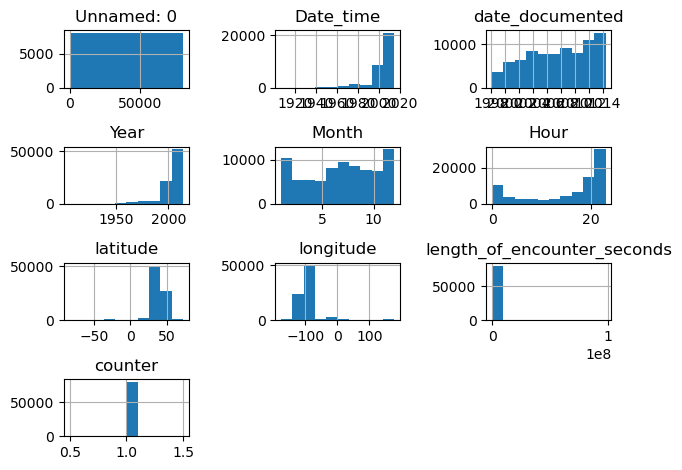

In [41]:
df.hist()
plt.tight_layout()
df.columns

count    80328.000000
mean      2003.850463
std         10.426547
min       1906.000000
25%       2001.000000
50%       2006.000000
75%       2011.000000
max       2014.000000
Name: Year, dtype: float64

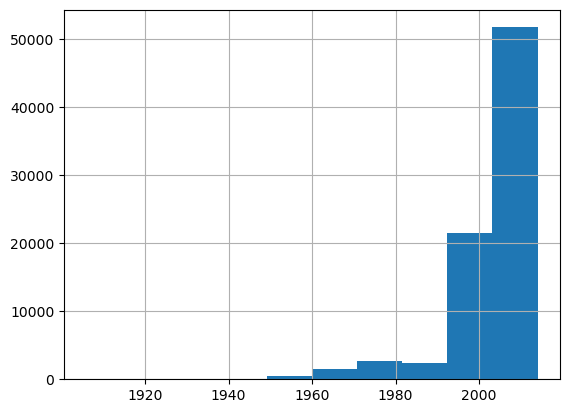

In [37]:
# interesting data
df['Year'].hist()
df['Year'].describe()
# total number of observations increased significantly over the years

count    80328.000000
mean         6.835026
std          3.234876
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         12.000000
Name: Month, dtype: float64

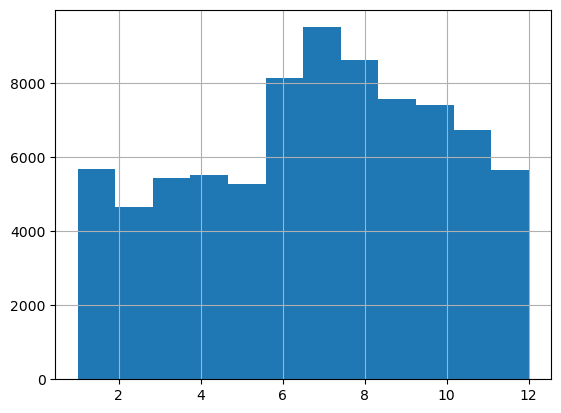

In [10]:
# interesting data

df['Month'].hist(bins=12) #matching number of monts with bins to represent data properly
df['Month'].describe()
# summer and autumn months are most prominent

count    80328.000000
mean        15.525172
std          7.753750
min          0.000000
25%         10.000000
50%         19.000000
75%         21.000000
max         23.000000
Name: Hour, dtype: float64

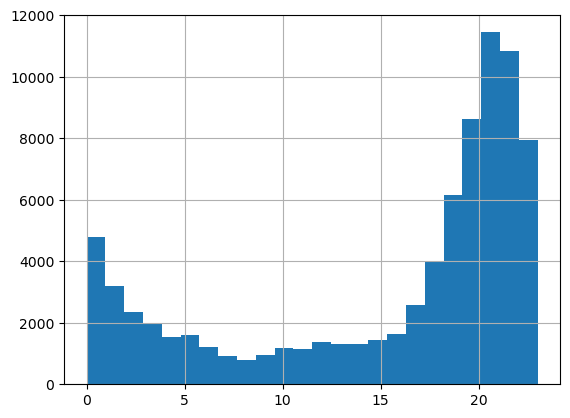

In [38]:
# interesting data

df['Hour'].hist(bins=24)
df['Hour'].describe()
# Dark hours are more likely

In [71]:
df['length_of_encounter_seconds'].head()

0    2700.0
1    7200.0
2      20.0
3      20.0
4     900.0
Name: length_of_encounter_seconds, dtype: float64

In [86]:
# Categories and labels
cats = [0, 10, 30, 60, 180, 300, 600,6000]
catstext = ["< 10sec", "10-30sec", "30-60sec", "1-3min", "3-5min", "5-10min","10+ mins"]

df['length_of_encounter_seconds'].value_counts()

#how do I slice this??


length_of_encounter_seconds
300.00     8635
120.00     7110
600.00     6312
60.00      5866
180.00     5064
           ... 
199.00        1
1281.00       1
1420.00       1
120.15        1
181.00        1
Name: count, Length: 533, dtype: int64

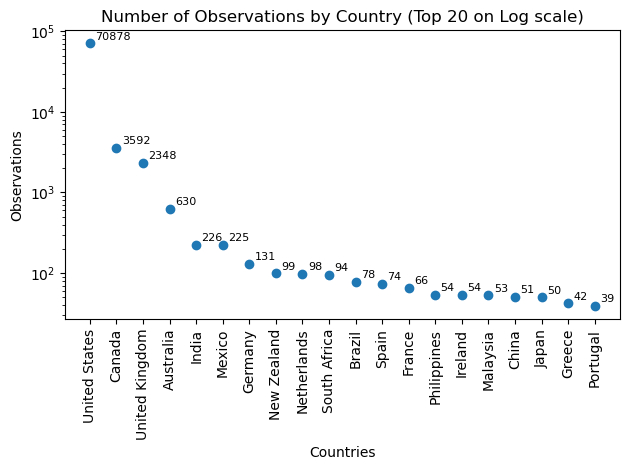

In [13]:
# Observations by Countries
countbycountry = df.groupby(['Country'], as_index=False).sum('counter') # 'as_index=False' re-indexes the dataframe so Countries remain a named column

# Create a DataFrame for observations/country visualization
cbc = pd.DataFrame().assign(Countries=countbycountry['Country'], Observations=countbycountry['counter']) #assign ref: https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/#:~:text=You%20can%20create%20a%20new,added%20to%20the%20original%20ones.

# Rank countries based on the number of observations
sorted= cbc.sort_values(by=['Observations','Countries'], ascending=False) #sort ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
sorted['Rank']=sorted['Observations'].rank(ascending=False) # add ranking ref: https://stackoverflow.com/questions/30425796/pandas-rank-by-column-value
toplot=sorted.head(20) # create mini dataframe toplot with top 20 countries
plt.scatter(toplot['Countries'],toplot['Observations'])
plt.xlabel('Countries')
plt.ylabel('Observations')
plt.title('Number of Observations by Country (Top 20 on Log scale)')
plt.xticks(rotation='vertical')
plt.yscale('log') #logarithmic scale to compensate for US extreme high value

for i, col in enumerate(toplot['Observations']): #get each index and each value from Observations
    plt.text(i+0.2, col*1.05, col, ha='left', va='bottom', fontsize=8)   # plt.text˙(x_coordinate, y_coordinate, value, horizontal pos, vertical pos, fontsize)
                                                                    # chart data labels ref: https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/

plt.tight_layout()
plt.show()

